In [115]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [116]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run/check_base_placements_april7/iris_placements/iris_placements.csv', index_col=0)
df = df.where(pd.notnull(df), None)
# remove duplicate names and keep the last one
df = df.drop_duplicates(subset='name', keep='last')
# Function to pad the lists in 'hit_names' to ensure they have 3 elements
# Function to convert string to list and pad it
import ast
def string_to_list_and_pad(s, size=3):
    lst = ast.literal_eval(s)
    return lst + [None] * (size - len(lst))

# Apply the function to each element in 'hit_names' and expand the result into new columns
df[['frag1', 'frag2', 'frag3']] = pd.DataFrame(
    df['hit_names'].apply(string_to_list_and_pad).tolist(),
    index=df.index
)
df

,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,hit_mols,hit_names,percent_hybrid,largest_ring,N_HA,N_rotatable_bonds,outcome,frag1,frag2,frag3
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,LXINEYASRREWNB-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-39.544639,448.542407,488.087046,0.928830,21.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b633...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",47.0,5,20,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-33.413351,382.748483,416.161833,0.554775,22.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b634...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",44.0,6,20,4,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,CEQDLNCRDRYDKS-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,18.321896,478.005917,459.684021,2.039166,24.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b636...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",48.0,6,21,5,too moved,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,GHOYNZDJCPMSBM-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-23.251420,391.568845,414.820265,0.551835,22.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b636...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",44.0,6,20,4,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None
5,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,BCPKNOZHZDDVQN-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-21.772725,476.657564,498.430290,0.582832,23.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b638...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",48.0,6,21,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1,HZNFTESFLXXWPL-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-5.933352,513.143903,519.077254,1.247241,19.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b6bb...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",50.0,6,18,6,too moved,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None
135,N#CCC(=O)Nc1ccncc1(NC(=O)CO),GCAQUNSOGCAEFO-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-1.582809,592.347383,593.930192,0.747603,18.0,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b6bb...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",50.0,6,17,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None
136,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,XBMUEFOOXYBEDQ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b6bc...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",NaN,0,0,0,too distant,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None
137,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,YREOFFMAGZFGRV-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,[<rdkit.Chem.rdchem.Mol object at 0x2adeb9b6bd...,"['A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1', ...",NaN,0,0,0,too distant,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None


In [117]:
# convert full fragment name to smaller fragment name using metadata_dict
metadata = pd.read_csv('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run/fragments/metadata.csv')
metadata_dict = dict(zip(metadata['Long code'], metadata['Code']))
# convert full fragment name to smaller fragment name using metadata_dict
def convert_to_small_name(s):
    return metadata_dict.get(s, s)
df['frag1_small'] = df['frag1'].apply(convert_to_small_name)
df['frag2_small'] = df['frag2'].apply(convert_to_small_name)
df['frag3_small'] = df['frag3'].apply(convert_to_small_name)
# make new column with all small fragment names combined
df['frag_small'] = df.apply(lambda row: [row['frag1_small'], row['frag2_small'], row['frag3_small']], axis=1)
df

,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,N_HA,N_rotatable_bonds,outcome,frag1,frag2,frag3,frag1_small,frag2_small,frag3_small,frag_small
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,LXINEYASRREWNB-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-39.544639,448.542407,488.087046,0.928830,21.0,...,20,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]"
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-33.413351,382.748483,416.161833,0.554775,22.0,...,20,4,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]"
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,CEQDLNCRDRYDKS-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,18.321896,478.005917,459.684021,2.039166,24.0,...,21,5,too moved,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]"
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,GHOYNZDJCPMSBM-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-23.251420,391.568845,414.820265,0.551835,22.0,...,20,4,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]"
5,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,BCPKNOZHZDDVQN-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-21.772725,476.657564,498.430290,0.582832,23.0,...,21,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1,HZNFTESFLXXWPL-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-5.933352,513.143903,519.077254,1.247241,19.0,...,18,6,too moved,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]"
135,N#CCC(=O)Nc1ccncc1(NC(=O)CO),GCAQUNSOGCAEFO-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-1.582809,592.347383,593.930192,0.747603,18.0,...,17,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]"
136,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,XBMUEFOOXYBEDQ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,0,0,too distant,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]"
137,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,YREOFFMAGZFGRV-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,0,0,too distant,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]"


In [118]:
# How many have ΔΔG values?
df['∆∆G'].notnull().sum()

94

In [119]:
df['outcome'].value_counts()

outcome
too moved        55
acceptable       29
too distant      18
too contorted    10
crashed           9
Name: count, dtype: int64

In [120]:
# add minimised mol column
direct_path = '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run/check_base_placements_april7/iris_placements/output'
df['minimised_mol'] = [f'{direct_path}/{row["name"]}/{row["name"]}.minimised.mol' 
                       if row['error'] is None else None 
                       for _, row in df.iterrows()]

df

,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,N_rotatable_bonds,outcome,frag1,frag2,frag3,frag1_small,frag2_small,frag3_small,frag_small,minimised_mol
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,LXINEYASRREWNB-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-39.544639,448.542407,488.087046,0.928830,21.0,...,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-33.413351,382.748483,416.161833,0.554775,22.0,...,4,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,CEQDLNCRDRYDKS-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,18.321896,478.005917,459.684021,2.039166,24.0,...,5,too moved,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,GHOYNZDJCPMSBM-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-23.251420,391.568845,414.820265,0.551835,22.0,...,4,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
5,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,BCPKNOZHZDDVQN-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-21.772725,476.657564,498.430290,0.582832,23.0,...,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0416_A_147_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0416a,None,"[Ax0310a, Ax0416a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1,HZNFTESFLXXWPL-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-5.933352,513.143903,519.077254,1.247241,19.0,...,6,too moved,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
135,N#CCC(=O)Nc1ccncc1(NC(=O)CO),GCAQUNSOGCAEFO-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-1.582809,592.347383,593.930192,0.747603,18.0,...,5,acceptable,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]",/Users/kate_fieseler/PycharmProjects/EV-A71-2A...
136,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,XBMUEFOOXYBEDQ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,0,too distant,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]",None
137,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,YREOFFMAGZFGRV-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,0,too distant,A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1,A71EV2A-x0732_A_201_A71EV2A-x0501+A+152+1,None,Ax0310a,Ax0732a,None,"[Ax0310a, Ax0732a, None]",None


In [121]:
with Chem.SDWriter('iris_placements.sdf') as writer:
    for i, row in df.iterrows():
        if row['minimised_mol'] is None:
            continue
        mol = Chem.MolFromMolFile(row['minimised_mol'])
        mol.SetProp('_Name', row['name'])
        mol.SetProp('outcome', row['outcome'])
        mol.SetProp('∆∆G', str(row['∆∆G']))
        writer.write(mol)

In [122]:
#!bust /Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run/check_base_placements_april7/iris_placements.sdf --outfmt csv

In [123]:
bust = pd.read_csv('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run/check_base_placements_april7/iris_placements_posebusters.csv')
bust

,file,molecule,mol_pred_loaded,sanitization,all_atoms_connected,bond_lengths,bond_angles,internal_steric_clash,aromatic_ring_flatness,double_bond_flatness,internal_energy
0,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,LXINEYASRREWNB-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
1,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,BHKVBKDDVLQZCR-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
2,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,CEQDLNCRDRYDKS-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
3,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,GHOYNZDJCPMSBM-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
4,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,BCPKNOZHZDDVQN-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
103,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,LISNPGIFHAQIEO-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
104,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,HZNFTESFLXXWPL-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
105,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,GCAQUNSOGCAEFO-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True
106,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,VXLLSVROUGTXAB-UHFFFAOYSA-N,True,True,True,True,True,True,True,True,True


In [124]:
# return rows where any value is False
any_false = bust[~bust.all(axis=1)]
any_false

,file,molecule,mol_pred_loaded,sanitization,all_atoms_connected,bond_lengths,bond_angles,internal_steric_clash,aromatic_ring_flatness,double_bond_flatness,internal_energy
51,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,ZTGLLUSSACMYNE-UHFFFAOYSA-N,True,True,True,True,True,False,True,True,True


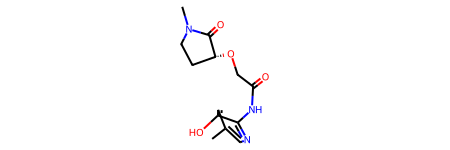

In [125]:
# look at it
name = any_false.iloc[0]['molecule']
file = f'/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run/check_base_placements_april7/iris_placements/output/{name}/{name}.minimised.mol'
mol = Chem.MolFromMolFile(file)
mol

In [126]:
bust.rename(columns={'molecule': 'name'}, inplace=True)
merged = pd.merge(df, bust, on='name', how='left')
merged.drop_duplicates(subset=['name'], inplace=True)
merged.head()
df = merged
df

,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,file,mol_pred_loaded,sanitization,all_atoms_connected,bond_lengths,bond_angles,internal_steric_clash,aromatic_ring_flatness,double_bond_flatness,internal_energy
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,LXINEYASRREWNB-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-39.544639,448.542407,488.087046,0.928830,21.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-33.413351,382.748483,416.161833,0.554775,22.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,CEQDLNCRDRYDKS-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,18.321896,478.005917,459.684021,2.039166,24.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,GHOYNZDJCPMSBM-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-23.251420,391.568845,414.820265,0.551835,22.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
4,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,BCPKNOZHZDDVQN-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-21.772725,476.657564,498.430290,0.582832,23.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1,HZNFTESFLXXWPL-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-5.933352,513.143903,519.077254,1.247241,19.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
130,N#CCC(=O)Nc1ccncc1(NC(=O)CO),GCAQUNSOGCAEFO-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-1.582809,592.347383,593.930192,0.747603,18.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
131,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,XBMUEFOOXYBEDQ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,YREOFFMAGZFGRV-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


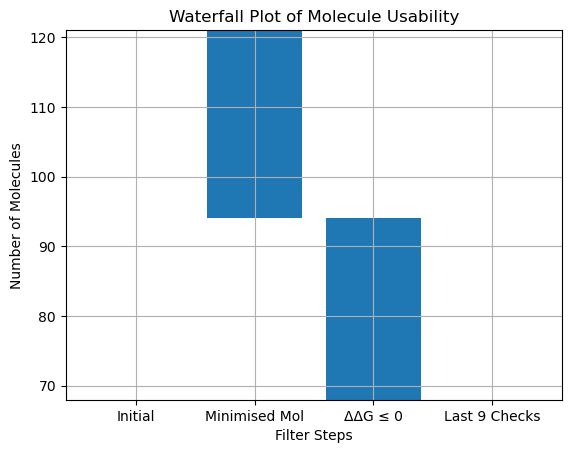

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_and_plot_waterfall(df):
    # Initial count
    initial_count = len(df)

    # Filter out rows where 'minimised_mol' is None
    df_filtered = df.dropna(subset=['minimised_mol'])
    after_minimised_mol_count = len(df_filtered)

    # Filter out rows where '∆∆G' is positive
    df_filtered = df_filtered[df_filtered['∆∆G'] <= 0]
    after_delta_G_count = len(df_filtered)

    # Filter out rows where any of the last 9 columns return False
    last_9_columns = df_filtered.columns[-9:]
    df_filtered = df_filtered[(df_filtered[last_9_columns] != False).all(axis=1)]
    after_last_checks_count = len(df_filtered)

    # Prepare data for the waterfall plot
    steps = ['Initial', 'Minimised Mol', 'ΔΔG ≤ 0', 'Last 9 Checks']
    values = [initial_count, after_minimised_mol_count, after_delta_G_count, after_last_checks_count]
    changes = [0] + [values[i] - values[i - 1] for i in range(1, len(values))]

    # Create waterfall plot
    plt.bar(steps, changes, bottom=[values[i] - changes[i] for i in range(len(values))])
    plt.title('Waterfall Plot of Molecule Usability')
    plt.xlabel('Filter Steps')
    plt.ylabel('Number of Molecules')
    plt.grid(True)
    plt.show()

    return df_filtered

# Assuming 'df' is your DataFrame
filtered_df = filter_and_plot_waterfall(df)


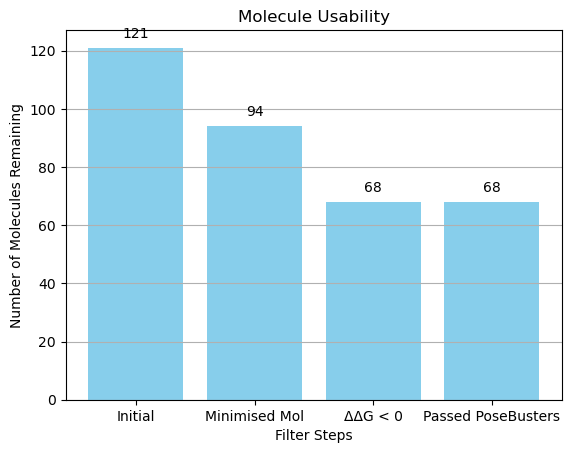

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_and_plot_waterfall(df):
    # Initial count
    initial_count = len(df)

    # Filter out rows where 'minimised_mol' is None
    df_filtered = df.dropna(subset=['minimised_mol'])
    after_minimised_mol_count = len(df_filtered)

    # Filter out rows where '∆∆G' is positive
    df_filtered = df_filtered[df_filtered['∆∆G'] < 0]
    
    after_delta_G_count = len(df_filtered)

    # Filter out rows where any of the last 9 columns return False
    last_9_columns = df_filtered.columns[-9:]
    df_filtered = df_filtered[(df_filtered[last_9_columns] != False).all(axis=1)]
    after_last_checks_count = len(df_filtered)

    # Prepare data for the waterfall plot
    steps = ['Initial', 'Minimised Mol', 'ΔΔG < 0', 'Passed PoseBusters']
    values = [initial_count, after_minimised_mol_count, after_delta_G_count, after_last_checks_count]

    # Create waterfall plot
    plt.bar(steps, values, color='skyblue')
    plt.title('Molecule Usability')
    plt.xlabel('Filter Steps')
    plt.ylabel('Number of Molecules Remaining')
    plt.grid(axis='y')

    # Add the count above each bar
    for i, v in enumerate(values):
        plt.text(i, v + max(values)*0.02, str(v), ha='center', va='bottom')

    plt.show()

    return df_filtered

# Assuming 'df' is your DataFrame
filtered_df = filter_and_plot_waterfall(df)

In [129]:
# show distribution of fragments
filtered_df

,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,file,mol_pred_loaded,sanitization,all_atoms_connected,bond_lengths,bond_angles,internal_steric_clash,aromatic_ring_flatness,double_bond_flatness,internal_energy
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,LXINEYASRREWNB-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-39.544639,448.542407,488.087046,0.928830,21.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-33.413351,382.748483,416.161833,0.554775,22.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,GHOYNZDJCPMSBM-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-23.251420,391.568845,414.820265,0.551835,22.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
4,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,BCPKNOZHZDDVQN-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-21.772725,476.657564,498.430290,0.582832,23.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
6,N#CCC(=O)Nc1cc(NC(=O)C2CCCO2)ccc1F,UASLKFQKYXHLQJ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-17.333756,418.007108,435.340865,0.565579,23.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,CN(C)C(=O)COc1cncc(NC(=O)C2CCCO2)c1,JOQRKFCIIQYZLX-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-30.588310,524.684673,555.272983,0.754840,23.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
128,N#CCC(=O)Nc1ccccc1(NC(=O)CO),LISNPGIFHAQIEO-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-40.556819,537.582445,578.139263,1.163845,19.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
129,Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1,HZNFTESFLXXWPL-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-5.933352,513.143903,519.077254,1.247241,19.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
130,N#CCC(=O)Nc1ccncc1(NC(=O)CO),GCAQUNSOGCAEFO-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,-1.582809,592.347383,593.930192,0.747603,18.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True


In [141]:
# show all designs that had errors
errors = df[~df['name'].isin(filtered_df['name'])]
errors.reset_index(drop=True, inplace=True)
errors.to_csv('iris_placements_errors.csv')
errors

,smiles,name,binary_hits,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,...,file,mol_pred_loaded,sanitization,all_atoms_connected,bond_lengths,bond_angles,internal_steric_clash,aromatic_ring_flatness,double_bond_flatness,internal_energy
0,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,CEQDLNCRDRYDKS-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,18.321896,478.005917,459.684021,2.039166,24.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
1,N#CCC(=O)Nc1cccc(NC(=O)CO)c1,IGUPJTYXYZPOEC-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)CO,NBJGZNPZLLTJSQ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N#CCC(=O)Nc1ccnc(NC(=O)CO)c1,ODONBPGOOMWOPQ-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cc1ccc(NC(=O)CO)cc1NC(=O)CC#N,TYJSTJNCXZDPLY-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N#CCC(=O)Nc1cc(NC(=O)CO)ccc1F,JVLRHPWRWSSGDH-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cc1cc(NC(=O)CO)cc(NC(=O)CC#N)c1,MBMRUNGQBMGNOP-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,DistanceError: A71EV2A-x0310_A_147_A71EV2A-x05...,expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,N#CCC(=O)Nc1cc(OCC(=O)N2CCOCC2)ccc1F,SXKJOQUQPNBOSA-UHFFFAOYSA-N,[b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...,None,expansion,14.689213,722.737732,708.048520,1.652635,24.0,...,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,True,True,True,True,True,True,True,True,True
8,CN(C)C(=O)c1ccc(F)cc1OC1CCN(C)C1=O,OTTBQIGJBPRLCN-UHFFFAOYSA-N,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...","PoisonError: None has poison atoms [3, 1, 2, 0...",expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CN(C)C(=O)c1ccccc1OC1CCN(C)C1=O,CKSCOKHGLICLHQ-UHFFFAOYSA-N,"[b""\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\...","PoisonError: None has poison atoms [3, 1, 2, 0...",expansion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
full_fragments = df['frag1_small'].tolist() + df['frag2_small'].tolist() + df['frag3_small'].tolist()
fragments = pd.Series(full_fragments)
fragments

0      Ax0310a
1      Ax0310a
2      Ax0310a
3      Ax0310a
4      Ax0310a
        ...   
358       None
359       None
360       None
361       None
362       None
Length: 363, dtype: object

In [131]:
success_fragments = filtered_df['frag1_small'].tolist() + filtered_df['frag2_small'].tolist() + filtered_df['frag3_small'].tolist()
success_fragments = pd.Series(success_fragments)
success_fragments

0      Ax0310a
1      Ax0310a
2      Ax0310a
3      Ax0310a
4      Ax0310a
        ...   
199       None
200       None
201       None
202       None
203       None
Length: 204, dtype: object

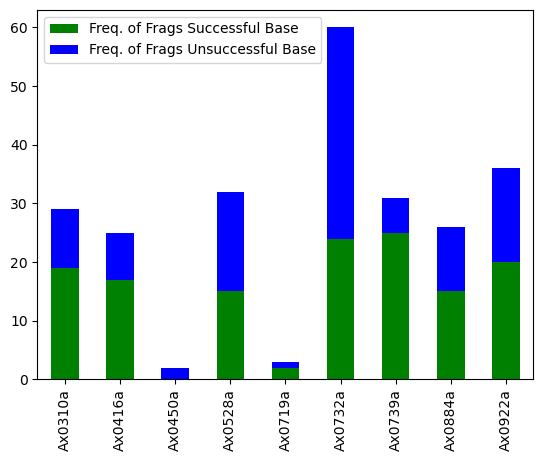

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each category
total_counts = fragments.value_counts()
success_counts = success_fragments.value_counts()

# Make sure every category is represented in both Series (to handle missing categories)
total_counts = total_counts.reindex(index = total_counts.index.union(success_counts.index), fill_value=0)

success_counts = success_counts.reindex(total_counts.index, fill_value=0)

# Calculate the difference to be plotted on top
difference_counts = total_counts - success_counts

# Create the bar chart
success_counts.plot(kind='bar', color='green', label='Freq. of Frags Successful Base')
difference_counts.plot(kind='bar', color='blue', bottom=success_counts, label='Freq. of Frags Unsuccessful Base')

plt.xticks(rotation=90)
plt.legend()
plt.show()

In [133]:
# Which fragment combinations are in the success?
# remove none if present
df['frag_small'] = df['frag_small'].apply(lambda x: [i for i in x if i is not None])
df['frag_small'] = df['frag_small'].apply(lambda x: str(x))
df['frag_small'].value_counts()

frag_small
['Ax0732a', 'Ax0922a']               18
['Ax0528a', 'Ax0732a']               16
['Ax0310a', 'Ax0732a']               13
['Ax0732a', 'Ax0884a']               13
['Ax0739a', 'Ax0884a']               10
['Ax0310a', 'Ax0739a']                9
['Ax0528a', 'Ax0416a']                9
['Ax0416a', 'Ax0922a']                9
['Ax0310a', 'Ax0416a']                7
['Ax0739a', 'Ax0922a']                7
['Ax0528a', 'Ax0739a']                5
['Ax0450a', 'Ax0528a']                2
['Ax0719a', 'Ax0884a', 'Ax0922a']     2
['Ax0719a', 'Ax0884a']                1
Name: count, dtype: int64

In [134]:
filtered_df['frag_small'] = filtered_df['frag_small'].apply(lambda x: [i for i in x if i is not None])
filtered_df['frag_small'] = filtered_df['frag_small'].apply(lambda x: str(x))
filtered_df['frag_small'].value_counts()

frag_small
['Ax0310a', 'Ax0739a']               8
['Ax0739a', 'Ax0884a']               8
['Ax0732a', 'Ax0922a']               8
['Ax0528a', 'Ax0416a']               7
['Ax0739a', 'Ax0922a']               7
['Ax0310a', 'Ax0416a']               6
['Ax0528a', 'Ax0732a']               6
['Ax0310a', 'Ax0732a']               5
['Ax0732a', 'Ax0884a']               5
['Ax0416a', 'Ax0922a']               4
['Ax0528a', 'Ax0739a']               2
['Ax0719a', 'Ax0884a']               1
['Ax0719a', 'Ax0884a', 'Ax0922a']    1
Name: count, dtype: int64

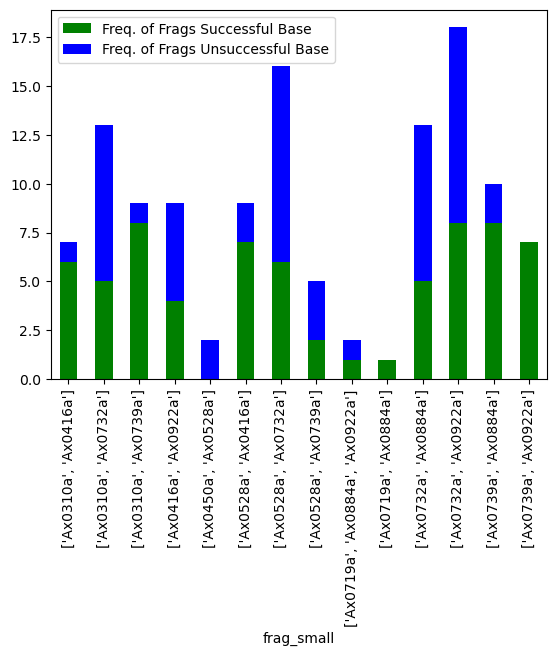

In [135]:
# Count the frequency of each category
total_counts = df['frag_small'].value_counts()
success_counts = filtered_df['frag_small'].value_counts()

# Make sure every category is represented in both Series (to handle missing categories)
total_counts = total_counts.reindex(index = total_counts.index.union(success_counts.index), fill_value=0)

success_counts = success_counts.reindex(total_counts.index, fill_value=0)

# Calculate the difference to be plotted on top
difference_counts = total_counts - success_counts

# Create the bar chart
success_counts.plot(kind='bar', color='green', label='Freq. of Frags Successful Base')
difference_counts.plot(kind='bar', color='blue', bottom=success_counts, label='Freq. of Frags Unsuccessful Base')

plt.xticks(rotation=90)
plt.legend()
plt.show()

In [136]:
# get sdf of success iris placememnts
with Chem.SDWriter('iris_placements_success.sdf') as writer:
    for i, row in filtered_df.iterrows():
        if row['minimised_mol'] is None:
            continue
        if row['∆∆G'] > 0:
            continue
        mol = Chem.MolFromMolFile(row['minimised_mol'])
        mol.SetProp('_Name', row['name'])
        mol.SetProp('outcome', row['outcome'])
        mol.SetProp('∆∆G', str(row['∆∆G']))
        writer.write(mol)

In [137]:
mols = Chem.SDMolSupplier('iris_placements_success.sdf')
len(mols)

68

In [142]:
# make csv of success placements
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.to_csv('iris_placements_success.csv')